Частина 1

​

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - acc: 0.5231 - loss: 0.2160 - val_acc: 0.7862 - val_loss: 0.1050
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8282 - loss: 0.0808 - val_acc: 0.8502 - val_loss: 0.0775
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8735 - loss: 0.0623 - val_acc: 0.8788 - val_loss: 0.0617
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8943 - loss: 0.0520 - val_acc: 0.8868 - val_loss: 0.0563
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9037 - loss: 0.0470 - val_acc: 0.8937 - val_loss: 0.0547
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9125 - loss: 0.0434 - val_acc: 0.8894 - val_loss: 0.0556
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9197 - loss: 0.0397 - val_acc: 0.9004 - val_loss: 0.0493
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9265 - loss: 0.0369 - val_acc: 0.9061 - val_loss: 0.0465
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

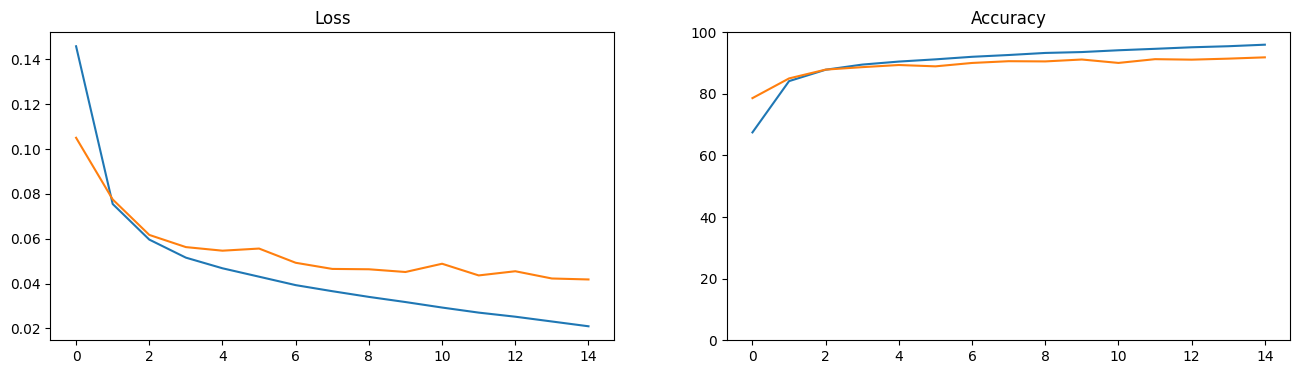

In [2]:
import matplotlib.pyplot as plt
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.optimizers import RMSprop, Adam

def plot_history(hst):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['acc']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_acc']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.show()

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train = x_train.astype('float32') / 155
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(984, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=RMSprop(learning_rate=0.0008),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Accuracy:", test_accuracy,"Loss:", test_loss)

plot_history(history)

Частина 2

​

В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_history(hst):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['acc']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_acc']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.show()

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))
x_train = tf.image.grayscale_to_rgb(x_train)
x_test = tf.image.grayscale_to_rgb(x_test)

VGG16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
VGG16_model.trainable = True
set_trainable = False

for layer in VGG16_model.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model = models.Sequential([
    VGG16_model,
    layers.Flatten(),
    layers.Dense(984, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0008),
              loss='binary_crossentropy',
              metrics=['acc'])

# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.15,
#     zoom_range=0.15,
#     horizontal_flip=True
# )

test_datagen = ImageDataGenerator()

# train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
# validation_generator = test_datagen.flow(x_test, y_test, batch_size=32)

history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=15,
    validation_data=(x_test, y_test)
    # ,validation_steps=50
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Accuracy:", test_accuracy,"Loss:", test_loss)

plot_history(history)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 182ms/step - acc: 0.6837 - loss: 0.1495 - val_acc: 0.8650 - val_loss: 0.0667
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - acc: 0.8695 - loss: 0.0627 - val_acc: 0.8584 - val_loss: 0.0687
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - acc: 0.8900 - loss: 0.0535 - val_acc: 0.8770 - val_loss: 0.0584
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 185ms/step - acc: 0.9012 - loss: 0.0481 - val_acc: 0.8895 - val_loss: 0.0535
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - acc: 0.9094 - loss: 0.0447 - val_acc: 0.9002 - val_loss: 0.0484
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 196ms/step - acc: 0.9125 - loss: 0.0424 - val_acc: 0.8954 - val_loss: 0.0521
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 192ms/step - acc: 0.9166 - loss: 0.0401 - val_acc: 0.8827 - val_loss: 0.0574
Epoch 8/15
314/469 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - acc: 0.9250 - loss: 0.0366